### **Questions to be answered:**
### 1. Is daily price change of amazon data normally distributed?
### 2. Is daily price change of amazon data significantly different from zero?
### 3. Can price movement be described as a random walk?


### **1. Is daily price change normally distributed?**

###**IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
#import pandas_datareader as pdr

from pandas_datareader import data as pdr  #to extract data from internet
import yfinance as yfin  #getting historical financial data from Yahoo Finance API

import matplotlib.pyplot as plt
from matplotlib import rcParams  #for matplotlib plots styling
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

###**EXTRACTING AMAZON DATA FROM YAHOO FINANACE (Starting from 06/06/2018)**

In [2]:
yfin.pdr_override()
data = pdr.get_data_yahoo('AMZN', start='2018-06-06')  #getting Amazon data

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-06,85.225502,85.724998,84.323502,84.787498,84.787498,109464000
2018-06-07,84.928001,84.995003,83.805496,84.464996,84.464996,75314000
2018-06-08,84.056000,84.472000,83.650497,84.199501,84.199501,59102000
2018-06-11,84.075500,84.711998,84.029503,84.456001,84.456001,46710000
2018-06-12,84.650002,84.975502,84.575996,84.937500,84.937500,45184000


**Description of Data**
1. **Open:** First price at which a trade is executed after the market opens for the day.
2. **High:** The highest price at which a financial asset traded during a specific trading session.
3. **Low:** The lowest price at which a financial asset traded during a specific trading session.
4. **Close:** Final trading price of a financial asset at the end of a trading session.
5. **Adj Close:** The adjusted close price is a modified version of the close price that takes into account certain corporate actions and events that can impact the stock's value, such as stock splits and dividends.
6. **Volume:** Volume refers to the total number of shares or units of a financial asset that were traded during a specific trading session.

###**CALCULATE INSTANTANEOUS RATE OF RETURNS**

In [4]:
#Instantaneous Rate of Return
amzn_close = data['Close']
amzn_returns = np.log(amzn_close).diff()
amzn_returns.head()

Date
2018-06-06         NaN
2018-06-07   -0.003811
2018-06-08   -0.003148
2018-06-11    0.003042
2018-06-12    0.005685
Name: Close, dtype: float64

###**PLOT THE INSTANTANEOUS ROR**

<Axes: xlabel='Date'>

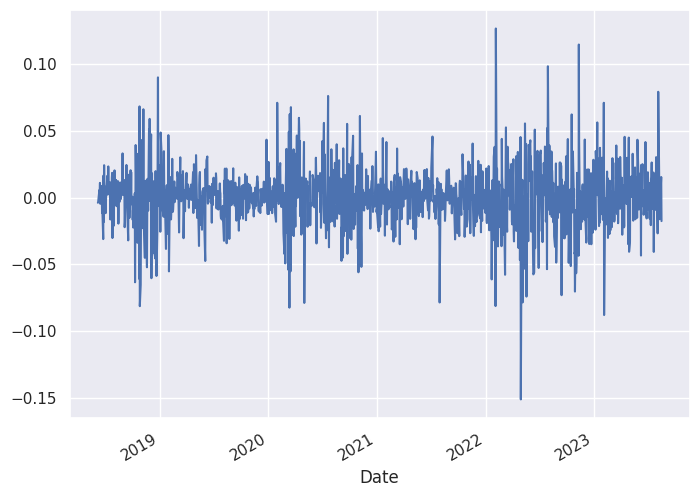

In [5]:
amzn_returns.plot()

###**DESCRIPTIVE STATISTICS OF RETURNS**

In [6]:
#Using Pandas
amzn_returns.describe()

count    1306.000000
mean        0.000374
std         0.022802
min        -0.151398
25%        -0.011107
50%         0.001028
75%         0.011963
max         0.126949
Name: Close, dtype: float64

In [7]:
# Using Scipy Stats packagage
from scipy import stats
amzn_returns.dropna(inplace=True)  #dropping the nan values from amzn_returns
n, minmax, mean, var, skew, kurt = stats.describe(amzn_returns)
std = var**0.5

In [8]:
print("Number of Observations: ",n)
print("(Minimum, Maximum): ",minmax)
print("Mean Value: ", mean)
print("Variance: ", var)
print("Skewness: ", skew)
print("Kurtosis: ", kurt)
print("Standard Deviation: ", std)

Number of Observations:  1306
(Minimum, Maximum):  (-0.15139791287665272, 0.12694891576845713)
Mean Value:  0.0003736406806233865
Variance:  0.0005199521807618668
Skewness:  -0.10922334855022663
Kurtosis:  3.997360851870382
Standard Deviation:  0.022802459971719428


**Points:**
1. We have negative skewness which means the distribution is longer on the left side of its peak. A normal distribution has zero skewness.
2. We have excess kurtosis of about 4. A normal distribution has a kurtosis of 3. Therefore, here the raw kurtosis is 3+4=7. Thus, the distribution is much more peaked than a normal distribution which means we have way more observations towrads the center.

###**COMPARISON OF "AMZN_RETURNS" DATA DISTRIBUTION WITH NORMAL DISTRIBUTION**

In [9]:
from scipy.stats import norm

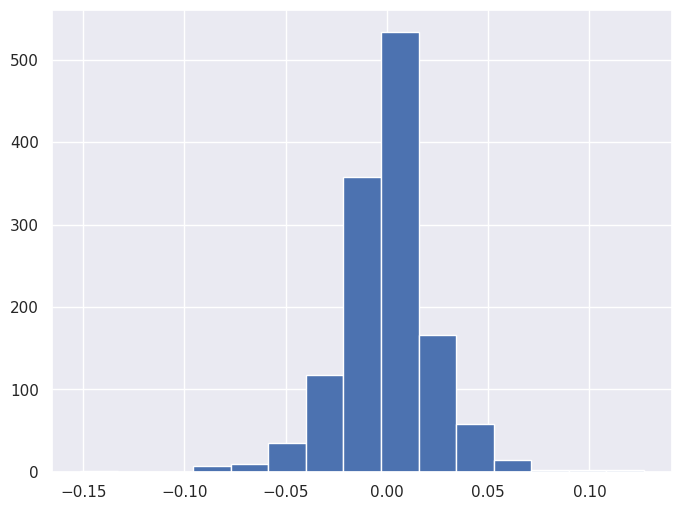

In [10]:
#fig, ax = plt.subplots(1,2,figsize=(8,6))
plt.hist(amzn_returns, bins=15);

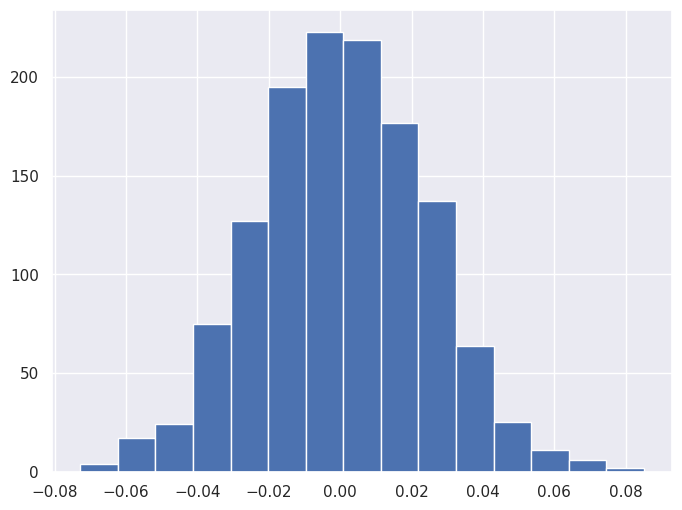

In [11]:
x = norm.rvs(mean, std, n)
plt.hist(x, bins=15);

###**TESTING WHETHER PRICE CHANGE IS NORMALLY DISTRIBUTED**

#### Testing the Kurtosis
#### Null Hypothesis is that the distribution is normal and if we have enough evidence we are going to reject it.

In [16]:
# Kurtosis test is testing whether we can consider the distribution normal or not. Basically tells whether the kurtosis
# is of normal distribution or not.
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_returns)

print(f'{"      Test Statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

      Test Statistic        p-value
     ------------------------------
x:             0.86          0.3891
AMZN:         11.22          0.0000


1. Basically p-value means that if we want to reject the null hypothesis, there's a 38.91% chance of getting it wrong.
2. Most Hypothesis tests would have an alpha of 0.05 and we would be able to reject the null if the p-value is less than 0.05 and we shouldn't reject it if it's greater than 0.05
3. Another interpretation of p-value is that there is 38.91% chance that we got the variation we see in that x variable from random chance.
4. Talking about the Amazon data, the p-value is shown 0. Although, it's not exactly 0 but close to 0. The p-value suggests that we should reject the null hypothesis and conclude that the **amzn cannot be considered as normally distributed.**


### **HISTOGRAM OF PRICE CHANGE WITH NORMAL CURVE OVERLAY**

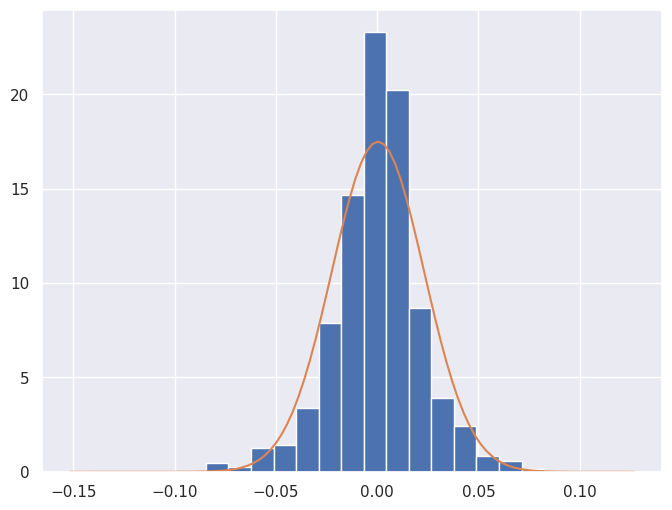

In [18]:
plt.hist(amzn_returns, bins = 25, edgecolor = 'w', density = True)
overlay = np.linspace(minmax[0], minmax[1], 100) #array of 100 equally spaced data points between minimum and maximum of amzn_returns
plt.plot(overlay, norm.pdf(overlay, mean, std));

#### We can see that the middle bars in our histogram are exceeding the theoritical normal distribution (with the amzn values). Even the edges aren't perfectly aligned.

#### **CONCLUSION: Daily price change of Amazon data is not normally distributed.**

### **2. Is daily price change have any directional bias?**

#### Null Hypothesis is that the daily price change is 0 or there is no directional bias.

In [20]:
#This is a test for the null hypothesis that the expected value (mean) of a sample of
#independent observations (here, amzn_returns) is equal to the given population mean, popmean (here, 0).

# Two sided alternative: The mean of the underlying distribution of the sample is different than the given popmean (i.e., either in
# positive or negative direction)

stats.ttest_1samp(amzn_returns, 0, alternative='two-sided')

TtestResult(statistic=0.5921667810101936, pvalue=0.5538414906356582, df=1305)

#### p-value is 0.55 which is more than the assumed alpha value of 0.05. Therefore, we should not reject the null hypothesis.

### **CONCLUSION: Daily price change of data does not have any directional bias.**

### **3. Can price movement be described as a random walk?**

###**CREATE PRICE LAGS**

In [24]:
amzn_close_df = pd.DataFrame(amzn_close, columns = ['Close'])
amzn_close_df['lag1'] = amzn_close.shift(1)
amzn_close_df['lag2'] = amzn_close.shift(2)
amzn_close_df.dropna(inplace=True)
amzn_close_df.head()

,Close,lag1,lag2
Date,,,
2018-06-08,84.199501,84.464996,84.787498
2018-06-11,84.456001,84.199501,84.464996
2018-06-12,84.937500,84.456001,84.199501
2018-06-13,85.242996,84.937500,84.456001
2018-06-14,86.193001,85.242996,84.937500


### **FIT LINEAR MODEL**

In [29]:
lr = np.linalg.lstsq(amzn_close_df[['lag1', 'lag2']], amzn_close_df['Close'], rcond=None)[0]
lr

array([0.97436169, 0.02569521])

#### The output is saying that the lag1 is contributing about 97.4% towards predicting the next day's price and lag2 is only contributing the remaining 2.6%.

In [30]:
amzn_close_df['predict'] = np.dot(amzn_close_df[['lag1', 'lag2']], lr)  #matrix multiplication to calculate predicted returns
amzn_close_df.head()

,Close,lag1,lag2,predict
Date,,,,
2018-06-08,84.199501,84.464996,84.787498,84.478089
2018-06-11,84.456001,84.199501,84.464996,84.211114
2018-06-12,84.937500,84.456001,84.199501,84.454216
2018-06-13,85.242996,84.937500,84.456001,84.929961
2018-06-14,86.193001,85.242996,84.937500,85.239997


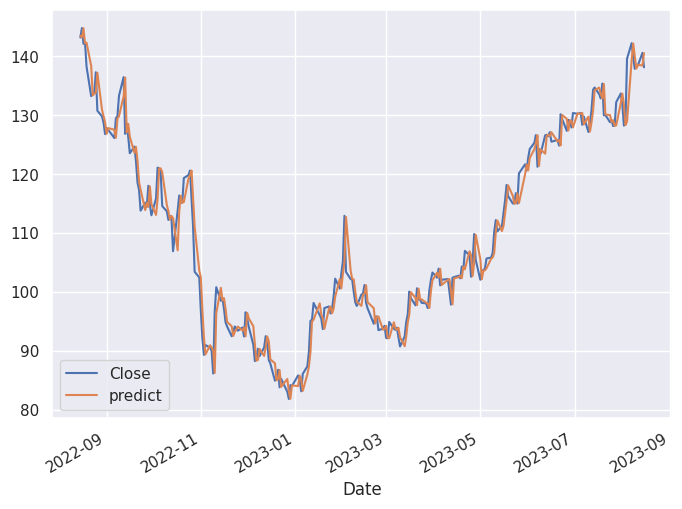

In [33]:
amzn_close_df[-252:][['Close', 'predict']].plot();  #taking the last year data and comparing the actual and predicted returns

#### We can observe from the graph that the predicted returns follow the actual ones pretty well. If the price movement would have been a random walk then it would have been difficult to predict the returns. But here that's not the case.
### **CONCLUSION: Price movement is not random walk.**